# Part I - Prosper Loan Dataset
## by Kristina

## Introduction
The Prosper loan dataset contains information on thousands of loans issued by Prosper, a peer-to-peer lending marketplace that connects borrowers with investors. This dataset provides a valuable opportunity to explore trends and patterns in loan data, including factors that contribute to loan performance and borrower characteristics that affect loan outcomes.

In this analysis, we will use Python and a variety of data visualization and analysis tools to explore the dataset and gain insights into the factors that influence loan outcomes. We will start by cleaning and preprocessing the data, removing missing values and transforming variables as needed. We will then use descriptive statistics and visualization techniques to explore the relationships between loan attributes, borrower characteristics, and loan performance.

Our goal is to identify key factors that contribute to loan success or failure and to develop a predictive model that can be used to estimate the likelihood of loan default or other negative outcomes. By analyzing the Prosper loan dataset, we can gain valuable insights into the dynamics of peer-to-peer lending and develop strategies for improving loan performance and minimizing risk.


## Preliminary Wrangling


* [Gassering-Data](#1.-Gassering-Data)
* [Assesing-data](#2.-Assesing-data)
* [Cleaning-Data](#3.-Cleaning-Data)
* [Univariate-Exploration](#4.-Univariate-Exploration)
* [Bivariate-Exploration](#5.-Bivariate-Exploration)
* [Multivariate-Exploration](#6.-Multivariate-Exploration)
* [Conclusions](#7.-Conclusions)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline
pd.set_option('display.max_colwidth', None)

### 1. Gassering Data

> First look on my dataset


In [2]:
loan = pd.read_csv('prosperLoanData.csv')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [3]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### 2. Assesing data

In [4]:
loan.duplicated().sum()

0

In [5]:
loan.isnull().sum().sort_values(ascending=False)

GroupKey                         100596
LoanFirstDefaultedCycleNumber     96985
ScorexChangeAtTimeOfListing       95009
ProsperPrincipalOutstanding       91852
ProsperPrincipalBorrowed          91852
                                  ...  
IncomeRange                           0
IncomeVerifiable                      0
StatedMonthlyIncome                   0
LoanKey                               0
Investors                             0
Length: 81, dtype: int64

In [6]:
loan.sample(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
82519,C75535897214309103A0634,899587,2013-09-16 15:05:01.670000000,NaN,36,Current,NaN,0.19859,0.1620,0.1520,...,-15.79,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
95882,297335629357815354B9F7E,672563,2012-11-19 07:46:12.467000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-51.64,0.0,0.0,0.0,0.0,1.0,0,0,0.0,47
18216,4FCE35939186724702B9EA7,987113,2013-10-31 21:15:59.143000000,NaN,60,Completed,2013-12-30 00:00:00,0.31940,0.2925,0.2825,...,-14.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [7]:
print(loan['CreditGrade'].value_counts().sort_values(ascending=False), '\n')

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64 



In [8]:
loan['CreditGrade'].isnull().sum()

84984

In [9]:
unique_occupation = loan['Occupation'].unique()
print(unique_occupation)

['Other' 'Professional' 'Skilled Labor' 'Executive' 'Sales - Retail'
 'Laborer' 'Food Service' 'Fireman' 'Waiter/Waitress' 'Construction'
 'Computer Programmer' 'Sales - Commission' 'Retail Management'
 'Engineer - Mechanical' 'Military Enlisted' 'Clerical' nan 'Teacher'
 'Clergy' 'Accountant/CPA' 'Attorney' 'Nurse (RN)' 'Analyst'
 "Nurse's Aide" 'Investor' 'Realtor' 'Flight Attendant' 'Nurse (LPN)'
 'Military Officer' 'Food Service Management' 'Truck Driver'
 'Administrative Assistant' 'Police Officer/Correction Officer'
 'Social Worker' 'Tradesman - Mechanic' 'Medical Technician' 'Professor'
 'Postal Service' 'Civil Service' 'Pharmacist' 'Tradesman - Electrician'
 'Scientist' 'Dentist' 'Engineer - Electrical' 'Architect' 'Landscaping'
 'Tradesman - Carpenter' 'Bus Driver' 'Tradesman - Plumber'
 'Engineer - Chemical' 'Doctor' 'Chemist' 'Student - College Senior'
 'Principal' "Teacher's Aide" 'Pilot - Private/Commercial' 'Religious'
 'Homemaker' 'Student - College Graduate Student'
 'S

In [10]:
loan['Occupation'].isnull().sum()

3588

In [11]:
loan['ProsperRating (Alpha)'].isnull().sum()

29084

In [12]:
loan['ProsperRating (numeric)'].isnull().sum()

29084

Here we checked for duplicates, a quick summary of our dataset, to get an idea of the overall distribution of datatypes, null values and the datatypes of our columns

1. Remove empty values 
2. Left only importans columns (information features)
3. incorrect data in the columt of listingcreationdate - needed datatime
4. Not employed people in IncomeRange  replaced with 0 (as they dont have income)
5. delete duplicates (to be sure even if it was shown 0)

### 3. Cleaning Data

creating a copy of the original dataframe

In [13]:
clean_loan = loan.copy()
#clean_loan.to_csv('clean_loan.csv', index=False)

In [14]:
cols_for_loan = ['ListingNumber','ListingCreationDate', 'CreditGrade', 'LoanOriginalAmount','LoanStatus',
                 'ListingCategory (numeric)','BorrowerState','BorrowerAPR', 'IncomeRange',
                 'BorrowerRate', 'IncomeVerifiable', 'StatedMonthlyIncome', 'ProsperRating (Alpha)', 
                 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'Occupation','Term','EmploymentStatus',
                 'TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors']
clean_loan = clean_loan[cols_for_loan]
clean_loan.sample(5)

,ListingNumber,ListingCreationDate,CreditGrade,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,IncomeRange,BorrowerRate,...,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,Occupation,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
41039,370015,2008-07-19 11:54:23.200000000,E,3000,Chargedoff,1,MD,0.37453,"$50,000-74,999",0.3500,...,0.52,4.0,Professional,36,Full-time,19.0,0.13,135.71,15.0,37
98733,220429,2007-10-23 18:28:24.567000000,AA,5000,Completed,0,NJ,0.07680,"$25,000-49,999",0.0700,...,1.00,0.0,Clerical,36,Full-time,0.0,0.26,154.39,6.0,72
55591,870430,2013-08-14 19:21:47.813000000,NaN,4000,Current,1,CA,0.24758,"$50,000-74,999",0.2099,...,0.90,0.0,Student - College Junior,36,Self-employed,5.0,NaN,150.68,9.0,10
97501,536468,2011-10-31 07:45:14.500000000,NaN,3000,Current,7,NC,0.29254,"$25,000-49,999",0.2574,...,0.85,1.0,Teacher,36,Employed,12.0,0.12,120.46,13.0,53
52858,597549,2012-06-08 09:46:10.627000000,NaN,12000,Current,7,IL,0.16151,"$100,000+",0.1385,...,0.93,0.0,Professional,60,Employed,2.0,0.12,278.29,31.0,21


In [15]:
# drop duplicates in the dataset
clean_loan = clean_loan.drop_duplicates()

In [16]:
#verifying for duplicates
original_len= len(clean_loan)
if len(clean_loan) == original_len:
    print("No duplicates found")
else:
    print("Duplicate rows dropped")

No duplicates found


In [17]:
# fill the empty valus of occupation with Unspecified
clean_loan['Occupation'] = clean_loan['Occupation'].fillna('Unspecified')

In [18]:
#verifying for changed occupation
clean_loan.loc[clean_loan['Occupation'].str.contains('Unspecified'), ['ListingNumber', 'Occupation']]
#clean_loan['Occupation'].isnull().sum()

,ListingNumber,Occupation
34,1180690,Unspecified
39,24135,Unspecified
92,22591,Unspecified
146,31745,Unspecified
161,1086023,Unspecified
...,...,...
113709,1017315,Unspecified
113712,18121,Unspecified
113902,3579,Unspecified
113914,30223,Unspecified


In [19]:
# Convert the datetime column to a Pandas datetime object
clean_loan['ListingCreationDate'] = pd.to_datetime(clean_loan['ListingCreationDate'])

# Create separate columns for year, month, and day
clean_loan['Year'] = clean_loan['ListingCreationDate'].dt.year
clean_loan['Month'] = clean_loan['ListingCreationDate'].dt.month
clean_loan['Day'] = clean_loan['ListingCreationDate'].dt.day

# Verify changes
print(clean_loan[['ListingCreationDate', 'Year', 'Month', 'Day']].head())

      ListingCreationDate  Year  Month  Day
0 2007-08-26 19:09:29.263  2007      8   26
1 2014-02-27 08:28:07.900  2014      2   27
2 2007-01-05 15:00:47.090  2007      1    5
3 2012-10-22 11:02:35.010  2012     10   22
4 2013-09-14 18:38:39.097  2013      9   14


In [20]:
# drop ListingCreationDate column
clean_loan.drop(columns = ['ListingCreationDate'],inplace = True)

In [21]:
clean_loan = clean_loan.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

In [22]:
#replace null values as not 
clean_loan['EmploymentStatus'].value_counts()
#clean_loan['EmploymentStatus'].isnull().sum()
clean_loan['EmploymentStatus'] = clean_loan['EmploymentStatus'].fillna('Other')

#checking the replacement
clean_loan['EmploymentStatus'].value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Other             5997
Not available     5347
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [23]:
# change the word ranges into numeric meaning
clean_loan['IncomeRange'].unique()
clean_loan['IncomeRange'] = clean_loan['IncomeRange'].str.replace('Not employed', '$0').str.replace('Not displayed', '$0')
# Verify changes
clean_loan['IncomeRange'].value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
$0                 9168
$1-24,999          7241
Name: IncomeRange, dtype: int64

In [24]:
#make the data in columns ordered
prosper_rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
income_range_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

# Assign the correct order to each column
clean_loan['ProsperRating'] = pd.Categorical(clean_loan['ProsperRating'], categories=prosper_rating_order, ordered=True)
clean_loan['IncomeRange'] = pd.Categorical(clean_loan['IncomeRange'], categories=income_range_order, ordered=True)

# Verify changes
print(clean_loan[['ProsperRating', 'IncomeRange']].dtypes)

ProsperRating    category
IncomeRange      category
dtype: object


In [25]:
clean_loan.replace(to_replace={"ListingCategory": {0: "Unknown", 1: "Debt", 2: "Reno", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic", 11: "Engagement", 12: "Green", 13: "Household",
                                                                14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)

# Resulting dataframe

In [26]:
# display information about the cleaned dataset
clean_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   ListingNumber                       113066 non-null  int64   
 1   CreditGrade                         28953 non-null   object  
 2   LoanOriginalAmount                  113066 non-null  int64   
 3   LoanStatus                          113066 non-null  object  
 4   ListingCategory                     113066 non-null  object  
 5   BorrowerState                       107551 non-null  object  
 6   BorrowerAPR                         113041 non-null  float64 
 7   IncomeRange                         113066 non-null  category
 8   BorrowerRate                        113066 non-null  float64 
 9   IncomeVerifiable                    113066 non-null  bool    
 10  StatedMonthlyIncome                 113066 non-null  float64 
 11  ProsperRating

In [27]:
clean_loan.sample(5)

,ListingNumber,CreditGrade,LoanOriginalAmount,LoanStatus,ListingCategory,BorrowerState,BorrowerAPR,IncomeRange,BorrowerRate,IncomeVerifiable,...,Term,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,Year,Month,Day
98757,383279,AA,10000,Completed,Other,IA,0.12700,"$50,000-74,999",0.1200,True,...,36,Full-time,2.0,0.19000,332.14,15.0,305,2008,8,15
110063,524256,NaN,8000,Completed,Other,CA,0.09333,"$100,000+",0.0899,True,...,36,Employed,6.0,0.04000,254.36,31.0,132,2011,8,26
14692,551514,NaN,15000,Current,Business,AZ,0.17359,"$25,000-49,999",0.1449,True,...,36,Employed,2.0,0.37000,516.24,10.0,109,2012,1,14
108643,4557,D,3700,Defaulted,Unknown,NaN,0.20735,$0,0.2000,True,...,36,Other,NaN,0.14673,137.51,NaN,24,2006,3,31
58573,285521,C,4900,Chargedoff,Debt,MO,0.20575,"$75,000-99,999",0.1945,True,...,36,Self-employed,29.0,0.34000,180.73,74.0,87,2008,2,28


### What is the structure of your dataset?

> My dataset contains 113937 rows and 24 columns

### What is/are the main feature(s) of interest in your dataset?
Mainly there are few moments in which can be intrested for us according to given data, like:
>1. What factors are associated with loan default, and how can lenders use this information to reduce risk?
>2. How do loan interest rates vary by borrower demographics, loan amount, and loan purpose?
>3. What factors are associated with borrowers paying off their loans early, and how can lenders encourage this behavior?
>4. How do borrowers with different credit scores differ in terms of loan performance, and how can lenders use this information to make more informed lending decisions?
>5. How do borrower demographics and loan characteristics vary across different loan purposes, and how can lenders use this information to tailor their loan offerings to different customer segments?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Loan amount: This feature can be used to investigate the relationship between loan size and loan performance, as well as to identify the most common loan sizes.
Loan status: This feature provides information on whether a loan is current, delinquent, or in default, and can be used to investigate loan performance.
Borrower demographics: This includes information such as income, employment status, credit score, and education level, which can be used to investigate the relationship between borrower characteristics and loan performance.
Loan duration: This feature can be used to investigate the relationship between loan term and loan performance, as well as to identify the most common loan durations.
Interest rate: This feature can be used to investigate the relationship between interest rates and loan performance, as well as to identify the most common interest rates.
Loan purpose: This feature can be used to investigate the most common reasons borrowers take out loans, and how loan performance varies by loan purpose.
Listing category: This feature can be used to investigate the different categories of loans available on the platform, and how loan performance varies across categories.

## 4. Univariate Exploration

1. Investigation the distribution of APR and its relationship with loan status 

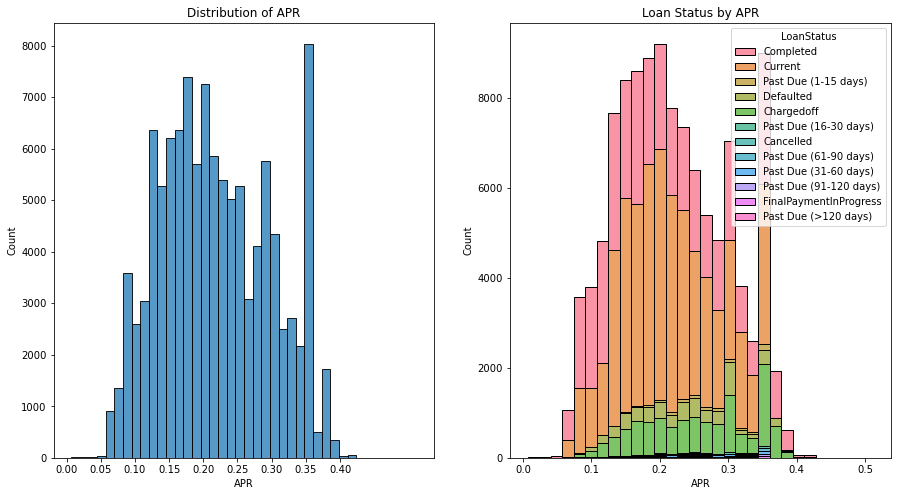

In [28]:
# create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))

# plot the distribution of APR
sb.histplot(data=clean_loan, x="BorrowerAPR",  bins=40,  ax=ax1)
ax1.set_title("Distribution of APR")
ax1.set_xlabel("APR")
ax1.set_xticks(np.arange(0, 0.45, 0.05))

# plot the loan status distribution for each APR range
sb.histplot(data=clean_loan, x="BorrowerAPR", hue="LoanStatus", multiple="stack", bins=30)
ax2.set_title("Loan Status by APR")
ax2.set_xlabel("APR")
ax2.set_ylabel("Count")

plt.show()

Observations:
>The distribution of Borrower APR in the Prosper loan dataset shows multiple peaks at approximately 0.09, 0.18, 0.2, and 0.3. There is also a sharp peak around 0.35. Overall, Borrower APR has a multimodal distribution. Borrower APR values less 0.05 and above 0.4 are rare in the given dataset. If look briefly at the priority categorical distribution, it can be seen that three types prevail: completed, current and chargedoff.

2. See the distribution of the LoanOriginalAmount

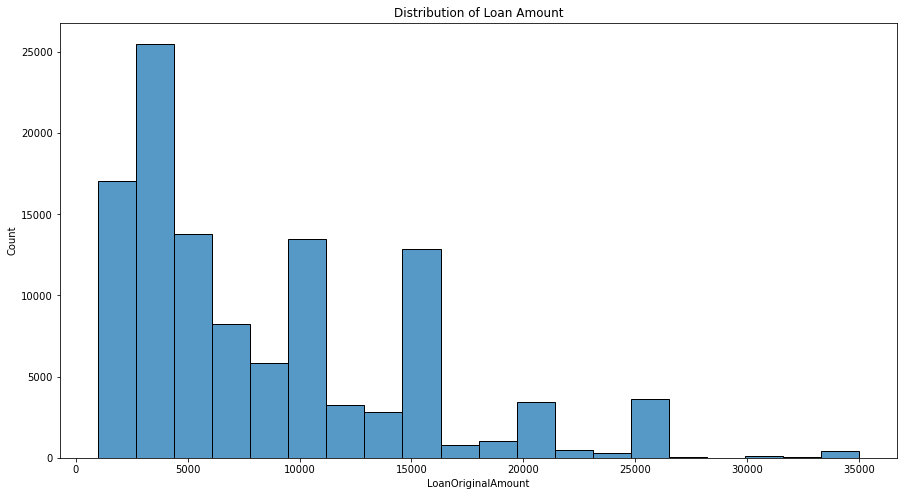

In [29]:
def plot_histogram(data, x_label, y_label, title, bins):
    plt.figure(figsize=[15, 8])
    sb.histplot(data=data, x=x_label, bins=bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Plot distribution of loan amount
plot_histogram(clean_loan, 'LoanOriginalAmount', 'Count', 'Distribution of Loan Amount', bins=20)


Observation
> The are pikes in frequency at 5k, 10k, 15k, 20k and 25k.

3. Investigation the distribution of Credit Grade

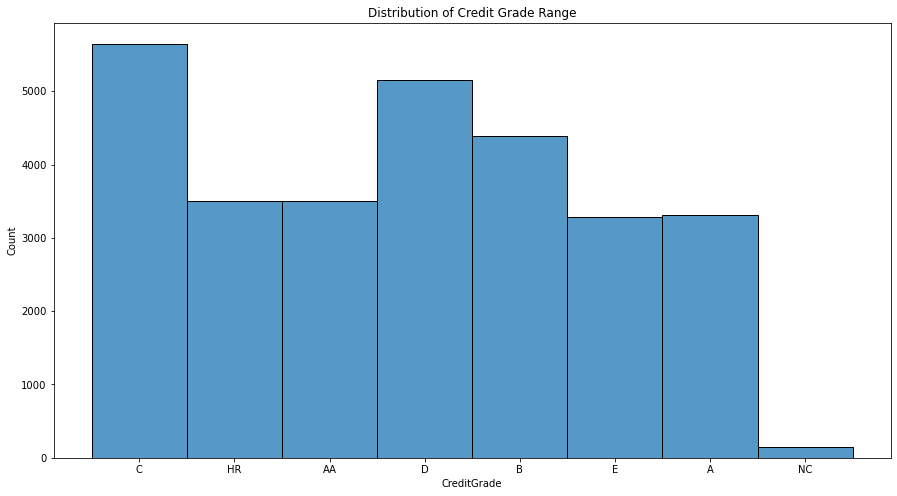

In [30]:
# Plot distribution of loan amount
plot_histogram(clean_loan, 'CreditGrade', 'Count', 'Distribution of Credit Grade Range', bins=20)

Observation
>Here we can mark 3 most destributed ranges as C, D, B and the least NC. It can be interpreted that most of the borrowers have average to above-average creditworthiness based on the lender's evaluation. This suggests that the lender is likely to have lower risk of loan defaults, as they are lending to borrowers who have a good credit history and are considered less risky.

4. Destribution of of Debt-to-Income Ratio

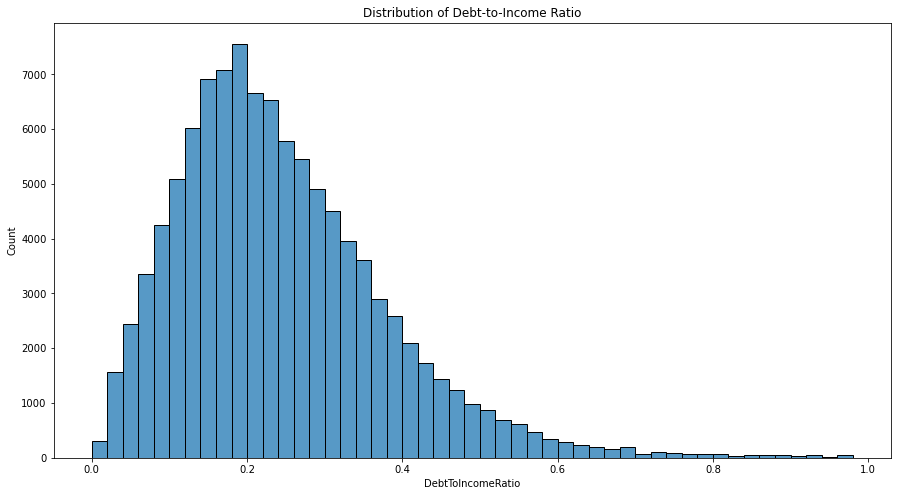

In [31]:
# Define the bins for the histogram
bins = np.arange(0, 1, 0.02)

# Create a histogram to visualize the distribution of debt-to-income ratio
plot_histogram(data=clean_loan, x_label='DebtToIncomeRatio', y_label='Count', title='Distribution of Debt-to-Income Ratio', bins=bins)


Observation
> The histogram has right skewed view with the peak at 0.2. It means that there are more borrowers with a lower debt-to-income ratio and fewer borrowers with a higher debt-to-income ratio. This suggests that most borrowers have a relatively low amount of debt compared to their income, while a smaller number of borrowers have a higher level of debt relative to their income.

5. Destribution of loans according employment status

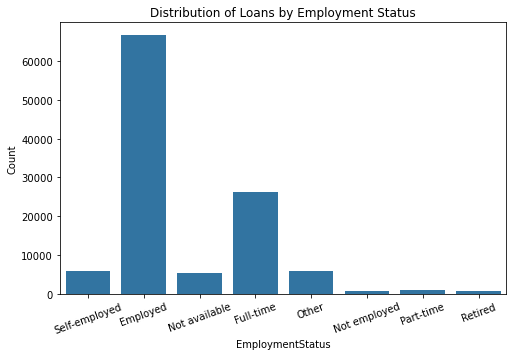

In [32]:
def plot_countplot(data, x_label, y_label, title, x_tick_rotation, ax):
    plt.figure(figsize=[8,5])
    sb.countplot(data=data, x=x_label, color=sb.color_palette()[0])
    plt.xticks(rotation=x_tick_rotation)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
plot_countplot(clean_loan, 'EmploymentStatus', 'Count', 'Distribution of Loans by Employment Status', x_tick_rotation=20, ax=1)

Observation
>The most amount of loans are spread among employed people and full-time. The least spreding almost even between part-time, not employed and retired, that not suprisingly as these people dosnt have clear income.

6. Destribution of categories for Occupation and ProsperRating columns

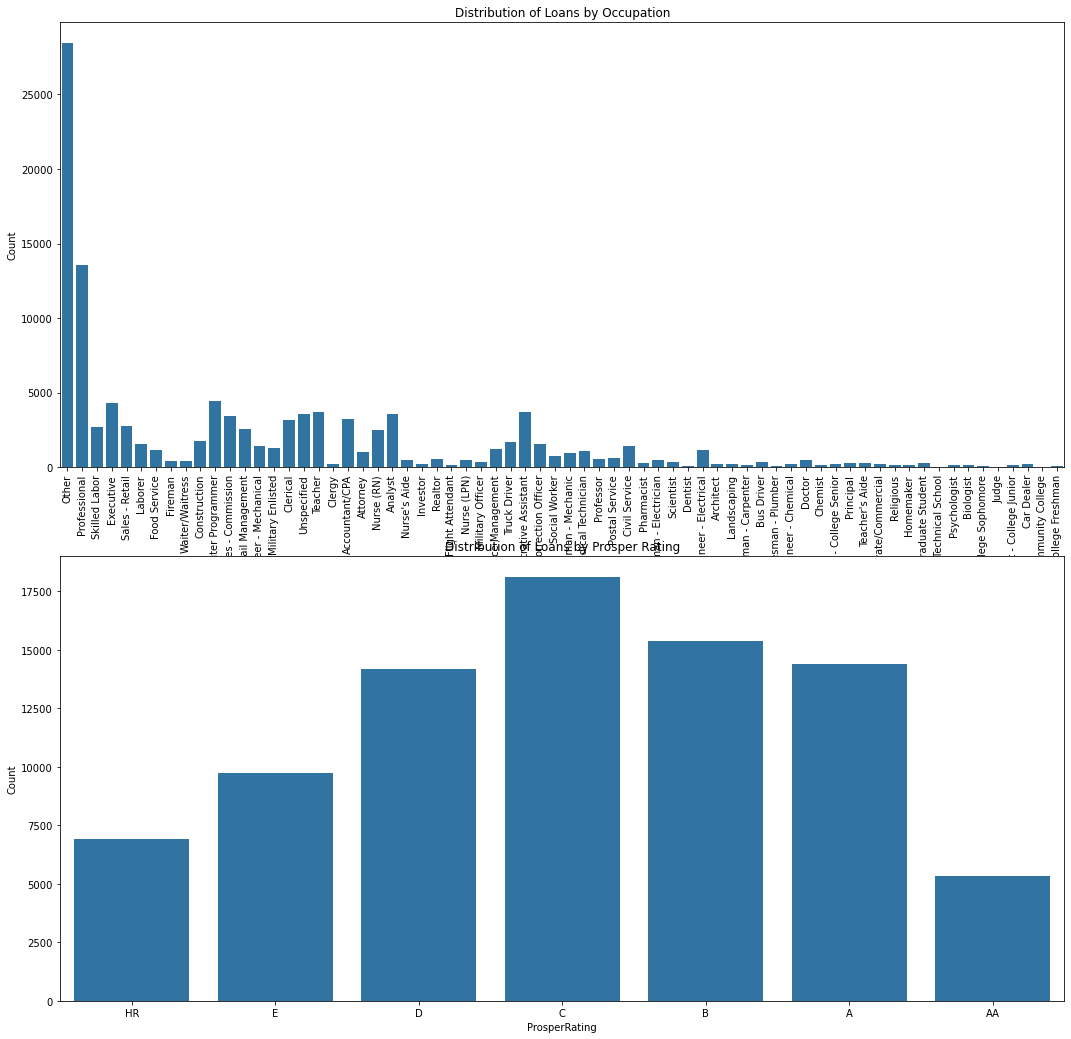

In [54]:
def plot_countplot(data, x_label, y_label, title, x_tick_rotation, ax=None):
    
    if not ax:
        ax=plt.gca()
    sb.countplot(data=data, x=x_label, color=sb.color_palette()[0], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=x_tick_rotation, ha='center')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, figsize=[18, 18])

# Create countplot for Occupation
plot_countplot(data=clean_loan, x_label='Occupation', y_label='Count', title='Distribution of Loans by Occupation', x_tick_rotation=90, ax=axs[0])

# Create countplot for ProsperRating
plot_countplot(data=clean_loan, x_label='ProsperRating', y_label='Count', title='Distribution of Loans by Prosper Rating', x_tick_rotation=0, ax=axs[1])




Observation
>The least of the borrowers are students, when the most is Professionals and Other representatives. The ratings of the most of the borrowers are from A to D (makin a bell-distribution)

7. Distribution patterns among date terms

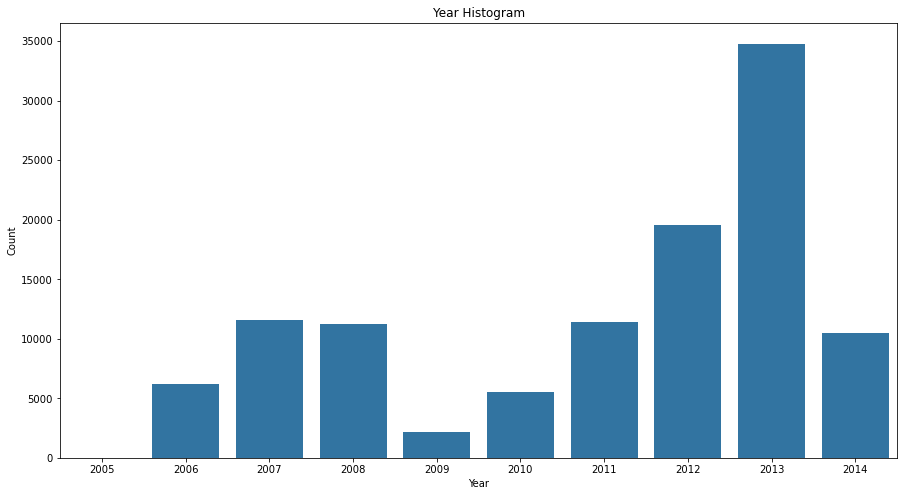

In [34]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=[15, 8])

# Plot the histogram
plot_countplot(data=clean_loan, x_label='Year', y_label='Count', title='Year Histogram', x_tick_rotation = 0, ax=ax)


Observations
>The number of listings has been consistently increasing over the years till 2013. However, it's important to note that the data only goes up and then reduces twicely.

8. The distributions of other variable as stated monthly income

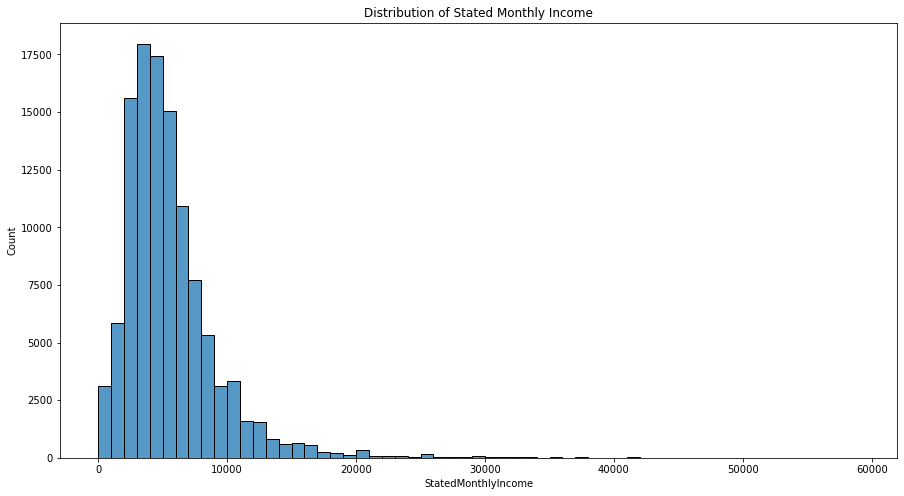

In [35]:
# define the bins for the StatedMonthlyIncome column
bins_smi = np.arange(0, 60000, 1000)

# plot a histogram of StatedMonthlyIncome using seaborn
plot_histogram(data=clean_loan, x_label="StatedMonthlyIncome", y_label="Count", title="Distribution of Stated Monthly Income", bins=bins_smi)

Observation
> Based on the information provided, it appears that the majority of borrowers in the dataset have monthly incomes in the range of 0-10000K, with the most common income levels being 5000k, and 10000k per month. Beyond an income of 30000k per month, the distribution of borrowers becomes less even, suggesting that high-income borrowers are less common in the dataset. Understanding the income levels of borrowers can be helpful in identifying any patterns or trends related to borrower income, and may also inform lending decisions and risk assessment strategies.

9. How Income range distributed in the dataset

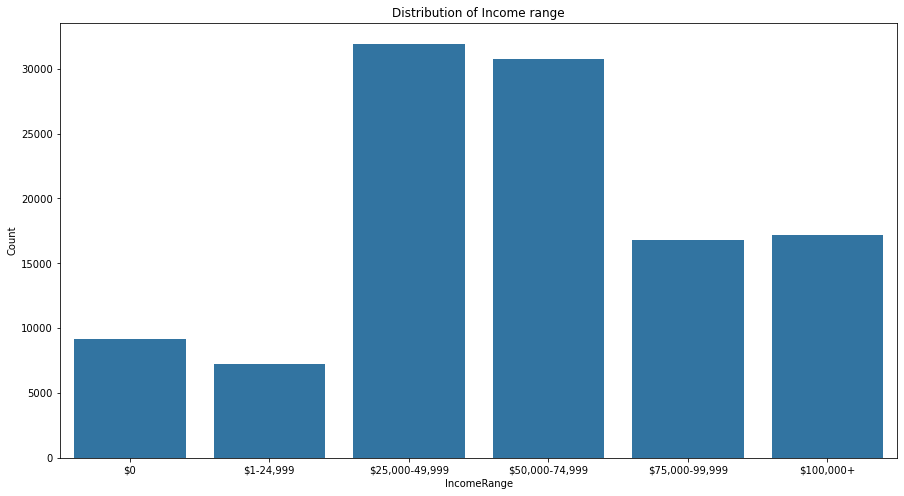

In [36]:
# Create a subplot with one axis
fig, ax = plt.subplots(figsize=[15, 8])

# Get the count of loans by employment status and sort in descending order
income_counts = clean_loan['IncomeRange'].value_counts().sort_values(ascending=True)

# Extract the ordered list of employment status categories from the count Series
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

# Convert EmploymentStatus column to categorical type with the specified order
clean_loan['IncomeRange'] = clean_loan['IncomeRange'].astype(pd.api.types.CategoricalDtype(ordered=True, categories=income_order))

# Create a countplot to visualize the distribution of loans by employment status
plot_countplot(data=clean_loan, x_label='IncomeRange', y_label='Count', title='Distribution of Income range', x_tick_rotation = 0, ax=ax)


Observation
>The data suggests that most listings in the dataset are associated with borrowers earning between 25,000 and 74,999 US dollars per annum, indicating a commonly observed income bracket. This information is useful for understanding borrower income levels and identifying potential patterns or trends in the data. It may also inform lending strategies and risk assessment analyses.

10. states have the highest number of listings created by borrowers

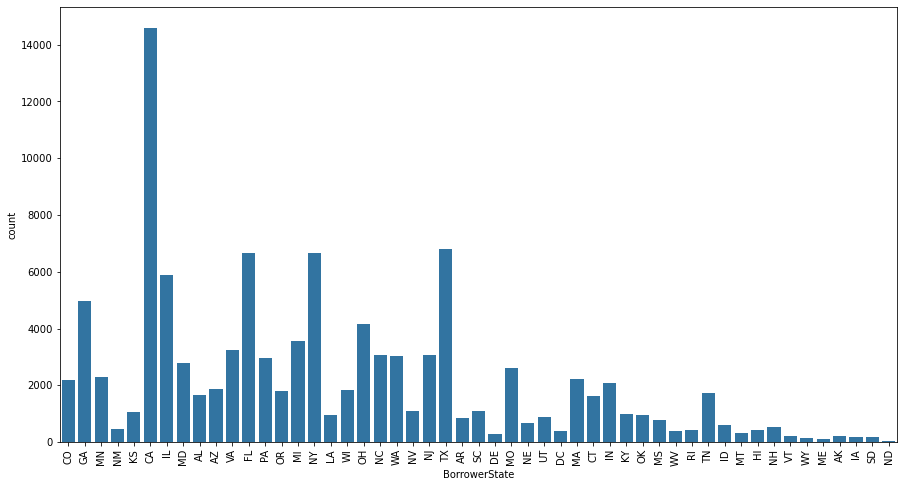

In [37]:
plt.figure(figsize=(15, 8))
colors = sb.color_palette()
sb.countplot(data=clean_loan, x='BorrowerState', color = colors[0])
plt.xticks(rotation= 90)
plt.show()

Observation
> The available data indicates that the state of California has the largest number of borrowers on the listings, with over 10,000 loan listings in the dataset. Other states such as Florida, New York, Texas, and Illinois also have a similar number of listings, indicating a comparable level of borrowing activity in these regions. In contrast, the states of Maine and North Dakota have the smallest number of listings by borrowers close to 0. This information provides insights into the geographical distribution of borrowers and can be useful for lenders and investors in developing lending strategies and identifying potential markets for loan offerings.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are no unusual points so we dont need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Were only observed skewed histograms, but we dont need any operations to do

## 5. Bivariate Exploration

1. Analyzing the dependence distribution between "Borrower APR" and "Loan Amount" in the Prosper loan dataset

Correlation coefficient: -0.32232269417024767


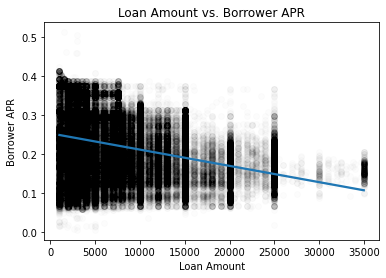

In [38]:
# Choose the two variables to explore
x_var = 'LoanOriginalAmount'
y_var = 'BorrowerAPR'

# Calculate the correlation coefficient
corr = clean_loan[x_var].corr(clean_loan[y_var])
print('Correlation coefficient:', corr)

# Create a regression line
sb.regplot(x=x_var, y=y_var, data=clean_loan, scatter_kws={'alpha':0.01, 'color': 'black'})
plt.title('Loan Amount vs. Borrower APR')
plt.xlabel('Loan Amount')
plt.ylabel('Borrower APR')
plt.show()


Observation
>The plot and regression analysis indicate a statistically significant negative correlation between LoanOriginalAmount and BorrowerAPR. The observed trend supports the notion that smaller loans tend to have higher interest rates, which can be attributed to fixed costs associated with loan processing and origination. On the other hand, larger loans may have slightly lower interest rates due to the economies of scale that come with higher loan amounts. This finding has important implications for lenders and borrowers, as it suggests that loan size should be carefully considered when evaluating the cost-effectiveness of different loan products. Overall, the observed relationship between loan size and interest rates highlights the need for nuanced and data-driven approaches to loan pricing and risk assessment.

2. Check how Loan Status dependce on Employment Status by Credit Grade
>This can help identify any patterns or trends in loan status with respect to both employment status and credit grade.

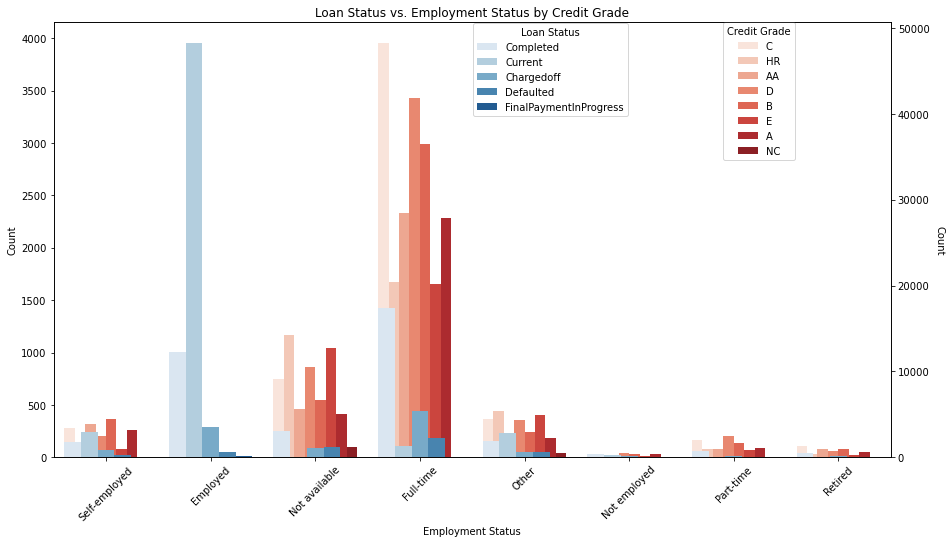

In [39]:
# set the plot size
plt.figure(figsize=[15,8])

# create the clustered bar chart
sb.countplot(data = clean_loan, x = 'EmploymentStatus', hue = 'CreditGrade', palette='Reds')

# set the x-axis label and rotate the tick labels
plt.xlabel('Employment Status')
plt.xticks(rotation=45)

# set the y-axis label
plt.ylabel('Count')

# add the legend
plt.legend(title='Credit Grade', bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)

# create a second y-axis
ax2 = plt.twinx()

# create a bar chart on the second y-axis for the loan status
sb.countplot(data = clean_loan, x = 'EmploymentStatus', hue = 'LoanStatus', hue_order=['Completed', 'Current', 'Chargedoff', 'Defaulted', 'FinalPaymentInProgress'], ax=ax2, palette='Blues')

# set the y-axis label for the second y-axis
ax2.set_ylabel('Count', rotation=270, labelpad=15)

plt.legend(title='Loan Status', bbox_to_anchor=(0.5, 1), loc=2, borderaxespad=0.1)

# add a title
plt.title('Loan Status vs. Employment Status by Credit Grade')

# show the plot
plt.show()


Observation
>Based on the analysis, it can be observed that the majority of employed individuals have a current loan status, while a relatively small proportion have completed loans. Full-time employees have an average credit grade, which is primarily linked to the number of completed credits and the "charged off" status, indicating that they were unable to make payments on their loans for an extended period. The "Not Available" group had a high risk credit rating, as they had two leading statuses indicating a failure to make payments and repay loans according to the terms of the agreement.

3. How does the borrower's employment status relate to their APR for loans, and are there any notable differences in APR among different employment status categories?

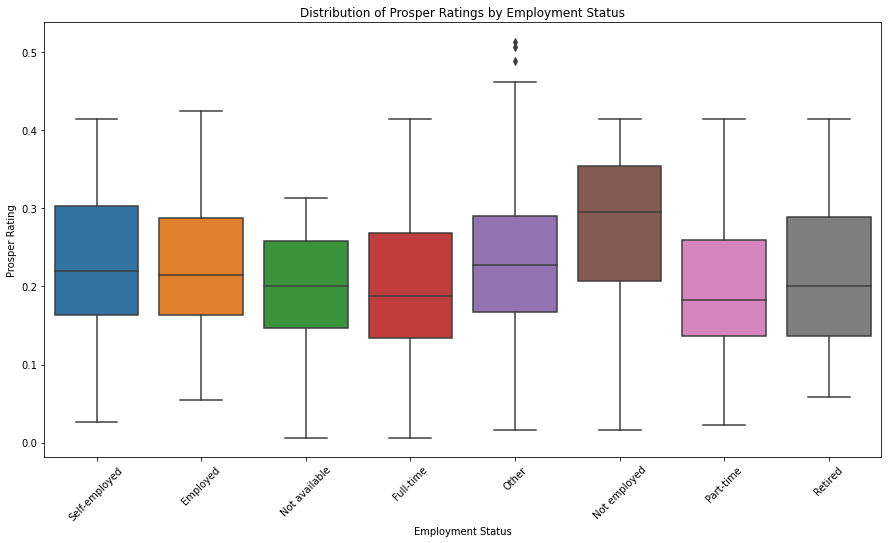

In [40]:
# Set the plot size
plt.figure(figsize=(15,8))

# Create the box plot
sb.boxplot(data=clean_loan, x='EmploymentStatus', y='BorrowerAPR')

# Set the x-axis label and rotate the tick labels
plt.xlabel('Employment Status')
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Prosper Rating')

# Add a title
plt.title('Distribution of Prosper Ratings by Employment Status')

# Show the plot
plt.show()



Observation
>Based on the information provided, we can conclude that there is a noticeable difference in the distribution of Prosper ratings based on the employment status of borrowers. Not-employed borrowers tend to have the highest median rating, while the ratings for other employment statuses are relatively similar. Additionally, the spread of the box and the size of the whiskers varies depending on the employment status. The 'other' group, for example, has the largest spread and a few outliers, while the 'not available' group has the smallest spread and a higher median rating. The shape of the distribution of Prosper ratings is generally similar across employment statuses, with similar beginning values, but notable differences in the range of the box and whiskers. The retired and not-employed groups have the largest box ranges, indicating greater variability in Prosper ratings, while the 'not available' group has the smallest box range. Overall, this suggests that employment status may be a significant factor in predicting Prosper ratings for borrowers.

4. How does the length of time an individual has been employed affect their prosperity rating?

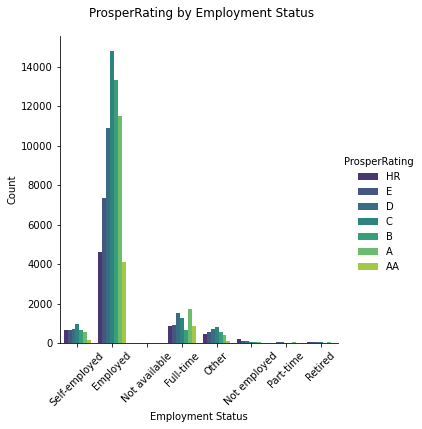

In [56]:
## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 8)

# Set Plot Dimensions - FIGURE LEVEL
g = sb.catplot(data=clean_loan, x='EmploymentStatus', hue='ProsperRating', kind='count', palette='viridis')

# Set the x-axis label
g.set(xlabel='Employment Status')
plt.xticks(rotation=45)

# Set the y-axis label
g.set(ylabel='Count')

# Add a title
g.fig.suptitle('ProsperRating by Employment Status', y=1.05)

# Show the plot
plt.show()


Observation
>Here we can see that individuals who are employed have a higher concentration of C Prosper rating, indicating that they are generally considered to be less risky borrowers. On the other hand, the least common Prosper rating for this category is AA, indicating that very few highly creditworthy individuals are employed.

>When it comes to full-time employment status, the visualization shows two peaks, with a higher concentration of D and A Prosper ratings. This suggests that full-time employment status is not necessarily a strong predictor of an individual's creditworthiness.

>Similar to the employed category, self-employed and other employment statuses have a higher concentration of C Prosper ratings. This could indicate that individuals in these categories may have more variable income streams, making them slightly riskier borrowers overall.

>An interesting point to note is that individuals who are not employed have an HR Prosper rating, indicating that they are high-risk borrowers. This could be the result of their lack of steady income and financial stability.

4. The relationship between ListingCategory and LoanOriginalAmount and reasons for appling for the largest loans on average?

In [42]:
# define a dictionary mapping numeric values to category names
category_titles = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business',
                   4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby & Adoption',
                   9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans',
                   13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical or Dental', 16: 'Motorcycle',
                   17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

# replace numeric values with category names
clean_loan['ListingCategory'] = clean_loan['ListingCategory'].replace(category_titles)

In [43]:
clean_loan['ListingCategory'].unique()

array(['Unknown', 'Reno', 'Motorcycle', 'Debt', 'Other', 'Household',
       'Auto', 'Medical', 'Wedding', 'Vacation', 'Business', 'Taxes',
       'Baby', 'Personal', 'Engagement', 'LargePurchase', 'Student',
       'Boat', 'RV', 'Cosmetic', 'Green'], dtype=object)

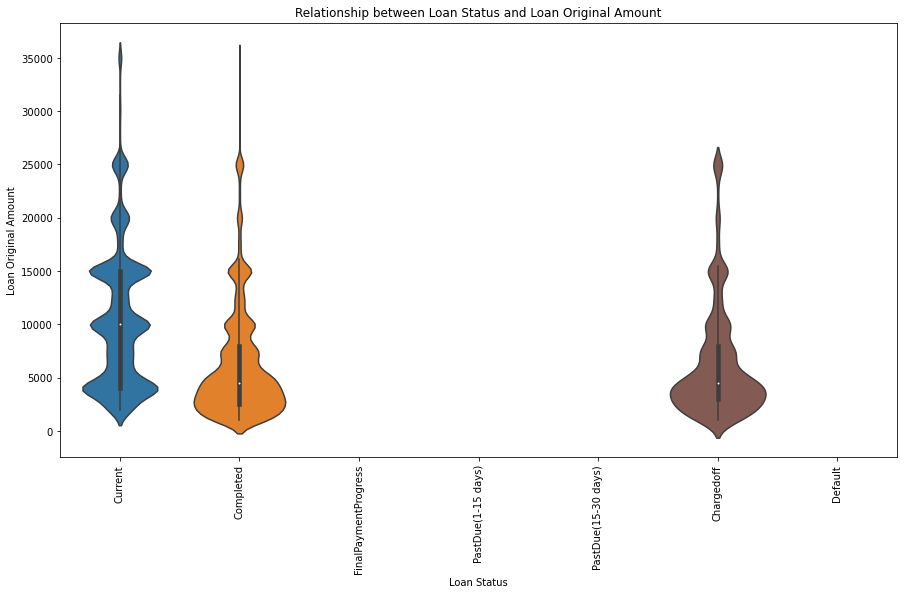

In [44]:
# Get the count of loans by loan status and sort in descending order
loan_counts = clean_loan['LoanStatus'].value_counts().sort_values(ascending=True)

# Extract the ordered list of loan status categories from the count Series
loan_status_order = ['Current', 'Completed', 'FinalPaymentProgress', 'PastDue(1-15 days)', 'PastDue(15-30 days)', 'Chargedoff', 'Default']

# Convert LoanStatus column to categorical type with the specified order
clean_loan['LoanStatus'] = clean_loan['LoanStatus'].astype(pd.api.types.CategoricalDtype(ordered=True, categories=loan_status_order))

# set the plot size
plt.figure(figsize=[15,8])
subset_data = clean_loan[['LoanStatus', 'LoanOriginalAmount']].dropna()
sb.violinplot(data=clean_loan, x='LoanStatus', y='LoanOriginalAmount')
plt.xlabel('Loan Status')
plt.xticks(rotation=90)
plt.ylabel('Loan Original Amount')
plt.title('Relationship between Loan Status and Loan Original Amount')
plt.show()


Observations
>The violin plots allow for a visual representation of the distribution of loan amounts across different loan statuses. The flattened form of the 'cancelled' status violin plot indicates a decrease in the range of loan amounts and a higher concentration of data points near zero. On the other hand, the 'current' status violin plot displays an unsymmetrical structure with three peaks at 5000, 10000, and 15000, indicating a higher frequency of data points in these regions. Similarly, the 'completed' status also has three peaks in the same points as the 'current' status but with a smoother first peak.

>In contrast, the 'past due more than 120 days' status violin plot exhibits the most symmetrical structure, suggesting an identical range of loan amounts throughout the entire status range. The 'past due 31-60 days' status violin plot displays the highest frequency of data points in the loan amount range, indicating a higher concentration of loan amounts in this category. The other status categories exhibit relatively even distributions of loan amounts across their respective ranges.

The loan status category of 'past due more than 120 days' exhibits a more symmetrical range of loan amounts because it represents loans that have not been paid for more than 120 days. This means that the loan amount has remained the same for this period, regardless of any additional fees or interest that may have accrued. As a result, the range of loan amounts remains relatively constant, resulting in a symmetrical distribution of data points in the violin plot.

In contrast, other loan status categories such as 'current' or 'past due 31-60 days' represent loans that are currently active or have been overdue for a shorter period. These loans may have varying loan amounts, depending on factors such as interest rates, fees, and the borrower's repayment behavior. This variability results in an unsymmetrical distribution of data points in the violin plot, as seen in the multiple peaks and valleys of the respective plots.

Therefore, the loan status category of 'past due more than 120 days' exhibits a more symmetrical range of loan amounts due to the fixed nature of the loan amount in this category over an extended period of time.

5. What is the most common 'LoanStatus' and 'ListingCategory' in the dataset

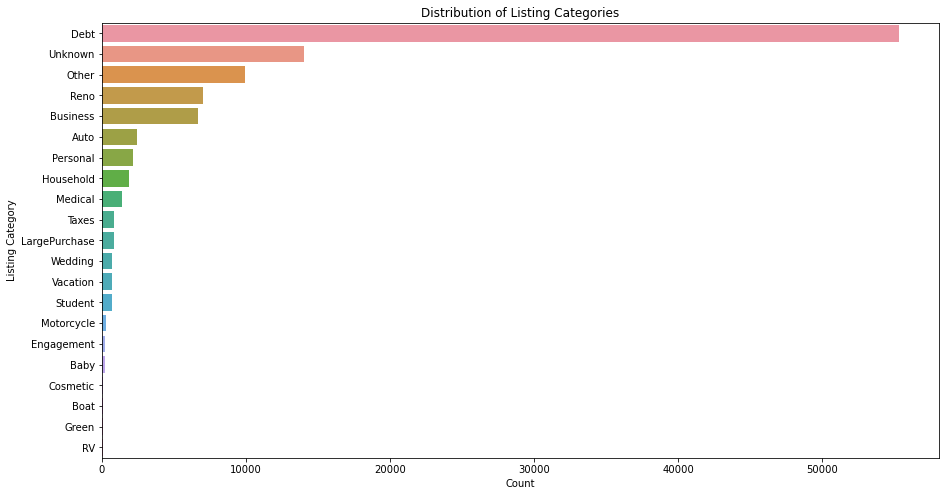

In [45]:
plt.figure(figsize=[15,8])
subset_data = clean_loan[['LoanStatus', 'ListingCategory']].dropna()
category_counts = subset_data['ListingCategory'].value_counts().sort_values(ascending=False)
sb.countplot(data=subset_data, y='ListingCategory', order=category_counts.index)
plt.xlabel('Count')
plt.ylabel('Listing Category')
plt.title('Distribution of Listing Categories')
plt.show()

Observations
> Based on the graphical representation, it can be inferred that the listing category "Debt Consolidation" has the highest frequency, with a corresponding loan amount of approximately 60000. On the other hand, the listing category "RV" has the lowest frequency, indicating that it is the least common among the observed categories. 

5. How the Total loan amount destributed per state

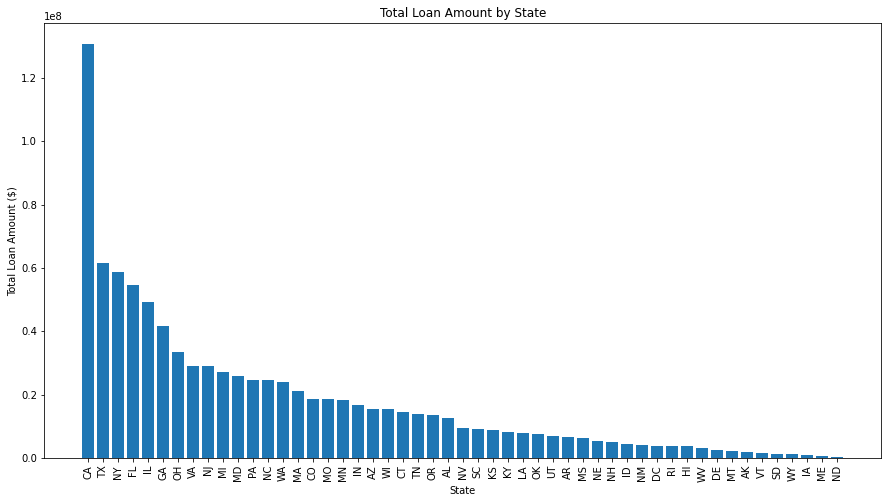

In [46]:
plt.figure(figsize=[15,8])
# Calculate total loan amount by state and sort in descending order
loan_totals = clean_loan.groupby('BorrowerState')['LoanOriginalAmount'].sum().reset_index().sort_values('LoanOriginalAmount', ascending=False)

# Create a barplot
plt.bar(loan_totals['BorrowerState'], loan_totals['LoanOriginalAmount'])

# Set the title and labels
plt.title('Total Loan Amount by State')
plt.xlabel('State')
plt.ylabel('Total Loan Amount ($)')
plt.xticks(rotation=90)

# Show the plot
plt.show()


Observation
> According to the available data, the state of California has the highest loan amount, followed by Texas (TK) and New York. On the other hand, the state of North Dakota (ND) has the lowest loan amount. This trend is consistent with the relationship between BorrowerAPR and state. However, it is important to note that correlation does not necessarily imply causation, and further analysis would be necessary to establish any causal relationship between these variables.

6. What is the average loan amount for each income range?

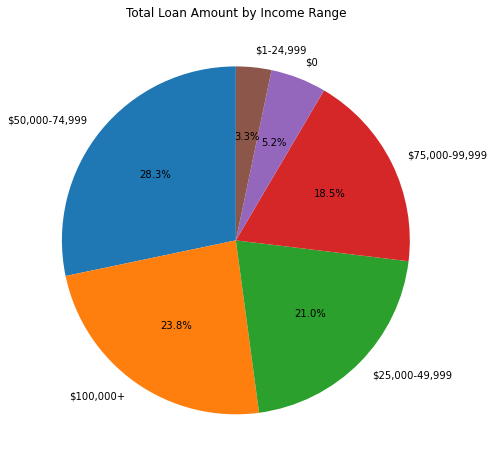

In [47]:
plt.figure(figsize=[15,8])

# Calculate total loan amount by income range and sort in descending order
loan_totals = clean_loan.groupby('IncomeRange')['LoanOriginalAmount'].sum().reset_index().sort_values('LoanOriginalAmount', ascending=False)

# Create a pie chart
plt.pie(loan_totals['LoanOriginalAmount'], labels=loan_totals['IncomeRange'], autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Total Loan Amount by Income Range')

# Show the plot
plt.show()


Observation
>Based on the analysis, the income range from 50K to 75K stands out as the leader in terms of loan amount, followed by three other income ranges with small differences between each other. There is a marginal increase of 2-3% from 23.8% for the income range above 100K, to 21% for the range from 25K-50K, and 18.5% for the range from 75K-100K. The lowest proportion of loan amounts are associated with the income range of 0 and 1-25K. These findings suggest that income range is a significant factor in determining loan amounts, and lenders could use this information to inform their lending policies and practices.

7. Dependence of Prspering Rating on Loan Amount

<AxesSubplot:xlabel='ProsperRating', ylabel='LoanOriginalAmount'>

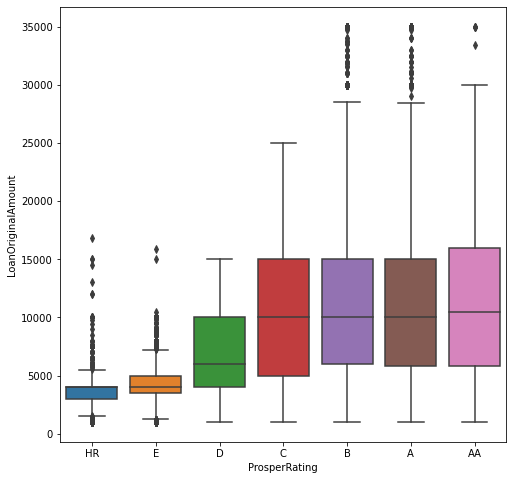

In [48]:
# Create a box plot of LoanOriginalAmount by ProsperRating
fig, ax = plt.subplots(figsize=[8,8])
sb.boxplot(data=clean_loan, x='ProsperRating', y='LoanOriginalAmount', ax=ax)

Observation
>2 boxes of HR and E (high risk) has similar shapes in way of amount of loans, The range from C to AA has almost equal destribution due to the mostly low risk of ratings. Even centers of the boxes are placed in the same range. In HR category there are more outliners what can be caused by persi=onilised characteristics of the borrower or the individual policy of loaner.

8.How has the 'LoanStatus' and 'ListingCategory' changed over time (years)?

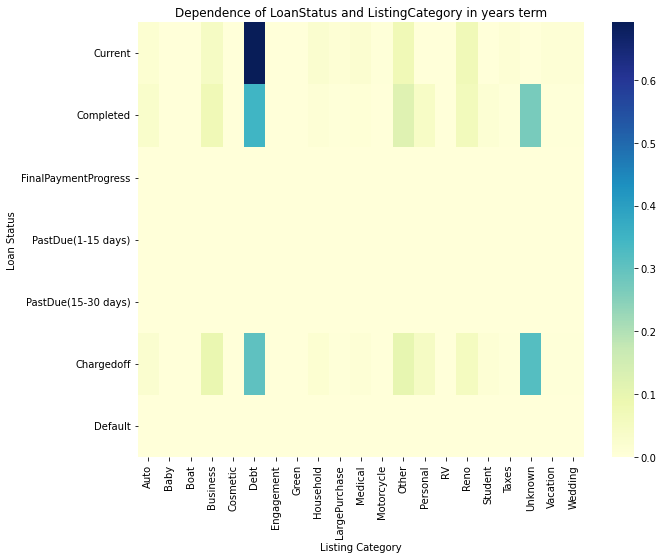

In [49]:
# Create heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(pd.crosstab(clean_loan['LoanStatus'], clean_loan['ListingCategory'], 
            values=clean_loan['Year'], aggfunc='count', normalize='index'), cmap='YlGnBu')
plt.title('Dependence of LoanStatus and ListingCategory in years term')
plt.xlabel('Listing Category')
plt.ylabel('Loan Status')
plt.show()


Observations
>The heatmap analysis shows that 'Debt Consolidation' had a higher proportion of loans across all the years, with current loan status being the most common and defaulted status being the least frequent. 'Cancelled' status in the 'Unknown' category was the most frequently visualized, and loan statuses with past due from 15 days were less distributed. 'Student', 'Baby', 'Boat', and 'RV' categories did not experience significant shifts in the distribution of loan statuses over the years. These insights provide valuable information for further analysis and business decisions in the lending industry.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The dependencies of Borrower APR per state are the same as the dependencies of loan amount per state, it suggests that there is a strong correlation between these two variables. This could mean that the factors that influence the APR in a particular state are the same factors that affect the loan amount in that state. For example, if a state has a higher cost of living, it may be associated with higher APRs and higher loan amounts. Alternatively, if a state has a more stable economy, it may be associated with lower APRs and lower loan amounts.


## 6. Multivariate Exploration

1. Dependence of BorrowerAPR, LoanOriginalAmount and IncomeRange

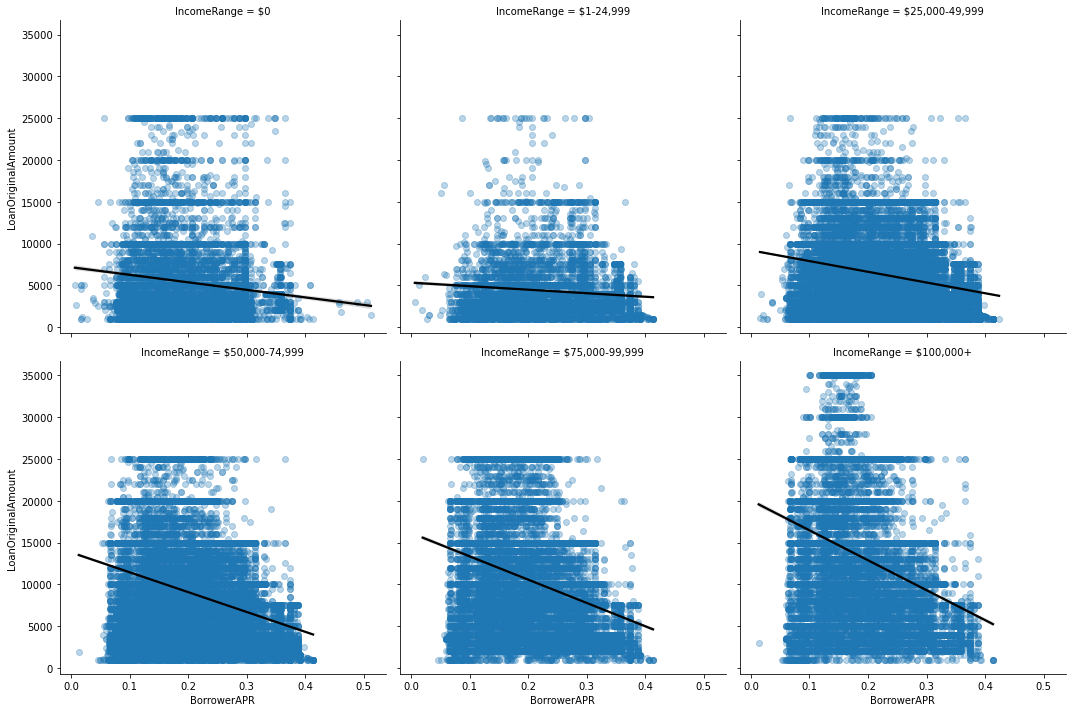

In [50]:
income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
g = sb.FacetGrid(data=clean_loan, col='IncomeRange', col_wrap=3, col_order=income_order, height=5)
g.map(sb.regplot, 'BorrowerAPR', 'LoanOriginalAmount', color=colors[0], scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
    

Observation
>The visual representation reveals a significant relationship between borrowers' income and the loan amount received, as well as the Annual Percentage Rate (APR) charged. Specifically, individuals with higher incomes tend to receive larger loans and benefit from lower APRs compared to those with lower incomes.
Furthermore, the observed negative correlation between income and APR across all income levels may indicate the presence of a lurking variable, which could also be influencing the relationship between income and APR.

2. Depenndence on Monthly Loan Payment vs. Prosper Rating by Term
>This can help identify any differences in the distribution of monthly loan payments for different Prosper ratings and loan terms

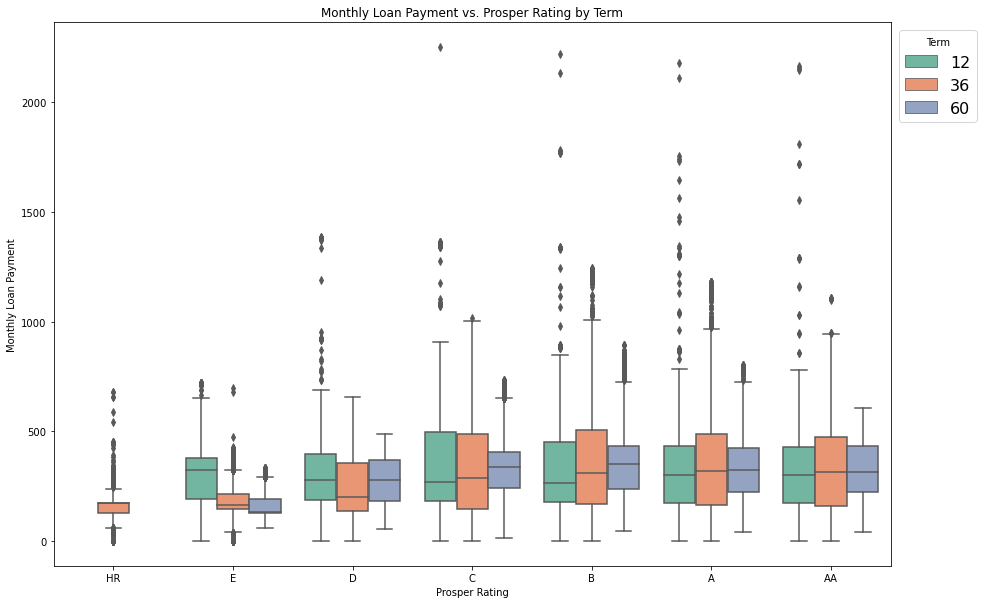

In [51]:
# set the plot size
plt.figure(figsize=[15,10])

# create the box plot
sb.boxplot(data=clean_loan, x='ProsperRating', y='MonthlyLoanPayment', hue='Term', palette='Set2')

# add the legend
plt.legend(title='Term', bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5, prop={'size': 16})

# set the x-axis label and rotate the tick labels
plt.xlabel('Prosper Rating')
plt.xticks(rotation=0)

# set the y-axis label
plt.ylabel('Monthly Loan Payment')

# add a title
plt.title('Monthly Loan Payment vs. Prosper Rating by Term')

# show the plot
plt.show()


Observation
>HR proper rating has only 36 month terms, while others have all 3 terms. For the E category, it is observed that the box spread decreases as the loan term increases. It is even shown that during the 60-day term, the center of the box, which describes the monthly loan payment, is close to the lowest border. So, it shows us that borrowers who choose a shorter term may pay a lower monthly payment, but they will need to make more payments overall. For other types of Prosper ratings, it can be said that the centers of the boxes of loan payments increase slightly with increasing duration of the loan term. And for the AA category, the monthly loan payments are even for all 3 terms. What is also shown is that the distribution of the box per 60 days is shorter in comparison to 12 and 30 for each category, which can be explained by the fact that loans with a shorter term have a shorter repayment period, and therefore, the distribution of the monthly loan payments is more compressed.
The biggest amount of outliers is observed for the 12-month term. This is because of the relatively shorter loan term, which may increase the chance of default or delay in repayment, leading to more variation in the monthly loan payments.

## 7. Conclusions
> In order to gain a more comprehensive understanding of the relationship between borrower APR, loan amount, and Prosper rating, I conducted a thorough multivariate analysis. The results of this investigation revealed a noteworthy trend: as Prosper ratings increase from HR to AA, the correlation between borrower APR and loan amount changes from negative to slightly positive. Furthermore, I delved deeper into the impact of rating and term on loan amount, discovering that higher Prosper ratings are linked to greater loan amounts across all three terms, with the amplitude of increase between terms becoming more pronounced as well.

>Moreover, I also investigated the influence of listing category on loan amount, and found that it varies across different states. This led me to explore how listing category affects loan amounts in each state, and I discovered that there are significant differences in the spread of listing categories and loan amounts among states. This information provides valuable insight into the lending market and can help inform future lending strategies.


In [52]:
# Save cleaned data locally
clean_loan.to_csv('./prosper_clean_loan.csv')

In [53]:
# Verify that the data was saved
! ls -lh *.csv

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
